In [3]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

import os
for dirname, _, filenames in os.walk('file.csv/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv('file.csv')
data = data.drop(columns=["Unnamed"])  # Drop unnecessary columns
X = data.drop(columns=['y']).values  
y = data['y'].values  
X = X.reshape(X.shape[0], X.shape[1], 1) 
from tensorflow.keras.utils import to_categorical
y = to_categorical(y - 1) 
cols = data.drop(columns=['y']).columns.tolist() 
X_df = data.drop(columns=['y'])  
print(X_df.describe())  

                 X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -11.581391    -10.911565    -10.187130     -9.143043     -8.009739   
std      165.626284    166.059609    163.524317    161.269041    160.998007   
min    -1839.000000  -1838.000000  -1835.000000  -1845.000000  -1791.000000   
25%      -54.000000    -55.000000    -54.000000    -54.000000    -54.000000   
50%       -8.000000     -8.000000     -7.000000     -8.000000     -8.000000   
75%       34.000000     35.000000     36.000000     36.000000     35.000000   
max     1726.000000   1713.000000   1697.000000   1612.000000   1518.000000   

                 X6            X7           X8           X9           X10  \
count  11500.000000  11500.000000  11500.00000  11500.00000  11500.000000   
mean      -7.003478     -6.502087     -6.68713     -6.55800     -6.168435   
std      161.328725    161.467837    162.11912    162.033

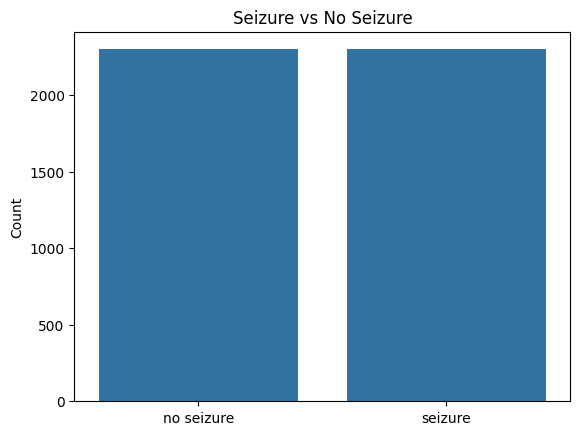

In [5]:
import seaborn as sn
labels = ['no seizure', 'seizure']
seizure = np.sum(y[:, 1])  # Count where class 1 is 1 (seizure)
no_seizure = np.sum(y[:, 0])  # Count where class 0 is 1 (no seizure)
sn.barplot(x=labels, y=[no_seizure, seizure])
plt.ylabel('Count')
plt.title('Seizure vs No Seizure')
plt.show()

In [6]:
y = np.argmax(y, axis=1) 
y = np.where(y > 0, 1, 0)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [7]:
print(y)

[1 0 1 ... 1 1 1]


In [8]:
print(X_train.shape)
print(X_test.shape)

(9200, 178, 1)
(2300, 178, 1)


In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  

In [10]:
X_train=pd.DataFrame(X_train.reshape(X_train.shape[0],X_train.shape[1] ), columns=cols)
X_test=pd.DataFrame(X_test.reshape(X_test.shape[0],X_test.shape[1]),columns=cols)

In [11]:
X_train_df = pd.DataFrame(X_train, columns=cols)
print(X_train_df.describe())

                X1           X2           X3           X4           X5  \
count  9200.000000  9200.000000  9200.000000  9200.000000  9200.000000   
mean    -12.265978   -11.566957   -10.624783    -9.381522    -8.028261   
std     169.190026   168.884552   165.498183   162.298170   160.950863   
min   -1839.000000 -1838.000000 -1835.000000 -1845.000000 -1791.000000   
25%     -54.000000   -54.250000   -54.000000   -54.000000   -54.000000   
50%      -8.000000    -7.000000    -7.000000    -7.000000    -8.000000   
75%      35.000000    36.000000    36.000000    36.000000    35.000000   
max    1726.000000  1713.000000  1697.000000  1612.000000  1518.000000   

                X6           X7           X8           X9          X10  ...  \
count  9200.000000  9200.000000  9200.000000  9200.000000  9200.000000  ...   
mean     -6.863478    -6.148804    -6.076630    -5.827391    -5.324891  ...   
std     160.056401   160.413283   162.257954   162.758628   159.977657  ...   
min   -1757.00000

In [12]:
print(f"Mean of X_train: {np.mean(X_train, axis=0)}")
print(f"Standard Deviation of X_train: {np.std(X_train,axis=0)}")


Mean of X_train: X1     -12.265978
X2     -11.566957
X3     -10.624783
X4      -9.381522
X5      -8.028261
          ...    
X174   -13.169565
X175   -12.691848
X176   -12.313587
X177   -12.109022
X178   -11.865435
Length: 178, dtype: float64
Standard Deviation of X_train: X1      169.180831
X2      168.875374
X3      165.489189
X4      162.289349
X5      160.942116
           ...    
X174    169.358827
X175    165.570873
X176    164.402239
X177    165.202286
X178    166.668131
Length: 178, dtype: float64


In [13]:
from tensorflow.keras.optimizers import Adam


In [14]:

model = Sequential()

# 1st Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# 2nd Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten Layer
model.add(Flatten())

# Fully connected (Dense) Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size = 64, validation_data=(X_test, y_test))

C:\Users\aarch\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.6829 - loss: 5.0997 - val_accuracy: 0.8930 - val_loss: 0.5862
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8047 - loss: 0.6059 - val_accuracy: 0.9230 - val_loss: 0.4713
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.8497 - loss: 0.5368 - val_accuracy: 0.8922 - val_loss: 0.3407
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9098 - loss: 0.2569 - val_accuracy: 0.9522 - val_loss: 0.1780
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9261 - loss: 0.1642 - val_accuracy: 0.9626 - val_loss: 0.1193
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9490 - loss: 0.1254 - val_accuracy: 0.9726 - val_loss: 0.0730
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9646 - loss: 0.0937 - val_accuracy: 0.9748 - val_loss: 0.0664
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9698 - loss: 0.0714 - val_accu

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
y_pred_cnn = model.predict(X_test)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9738 - loss: 0.0819
Test Accuracy: 0.9734782576560974
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f'CNN Model Accuracy: {accuracy_cnn}')
print(classification_report(y_test, y_pred_cnn))
conf_matrix = confusion_matrix(y_test, y_pred_cnn)
print("Confusion Matrix:")
print(conf_matrix)

CNN Model Accuracy: 0.9734782608695652
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       446
           1       0.97      1.00      0.98      1854

    accuracy                           0.97      2300
   macro avg       0.98      0.94      0.96      2300
weighted avg       0.97      0.97      0.97      2300

Confusion Matrix:
[[ 392   54]
 [   7 1847]]


In [17]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred_cnn):0.4f}')

Accuracy score: 0.9735


In [18]:
print(y_test)
print(y_pred_cnn)

[1 0 1 ... 1 1 0]
hello
[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


[[ 392   54]
 [   7 1847]]


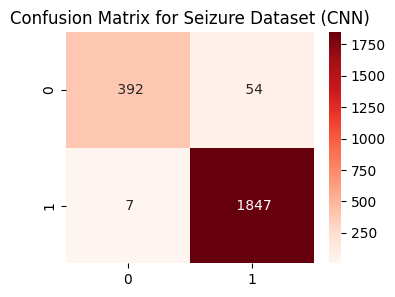

In [19]:
cf_matrix = confusion_matrix(y_test, y_pred_cnn)
print(cf_matrix)
plt.figure(figsize=(4, 3))
plt.title('Confusion Matrix for Seizure Dataset (CNN)')
sn.heatmap(cf_matrix, annot=True, fmt=' ', cmap='Reds')
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_cnn))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       446
           1       0.97      1.00      0.98      1854

    accuracy                           0.97      2300
   macro avg       0.98      0.94      0.96      2300
weighted avg       0.97      0.97      0.97      2300

